In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Reading csv files**

In [18]:
hpgst=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/hpg_store_info.csv')
airst=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/air_store_info.csv')
sub=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/sample_submission.csv')
test=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/test.csv')
train=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/train.csv')
hpgre=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/hpg_reserve.csv')
airre=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/air_reserve.csv')
date=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/date_info.csv')
rel=pd.read_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/store_id_relation.csv')

**EDA**- EXPLORATORY DATA ANALYSIS

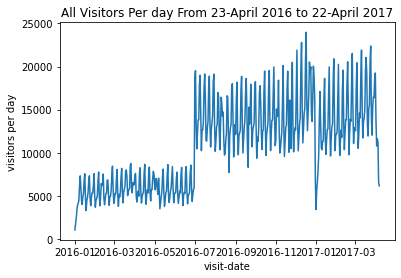

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
#number of visitors per day
air_visit_visitors_PerDay = pd.DataFrame(train.groupby("visit_date")["visitors"].sum()).reset_index()
air_visit_visitors_PerDay.index +=1

air_visit_visitors_PerDay.head()

air_visit_visitors_PerDay["visit_date"]=pd.to_datetime(air_visit_visitors_PerDay["visit_date"])

pyplot.plot(air_visit_visitors_PerDay["visit_date"],air_visit_visitors_PerDay["visitors"])

pyplot.xlabel("visit-date")
pyplot.ylabel("visitors per day")
pyplot.title("All Visitors Per day From 23-April 2016 to 22-April 2017")
pyplot.figure(figsize=(100,100))
pyplot.figure().subplots_adjust(bottom=0.2)
pyplot.show()

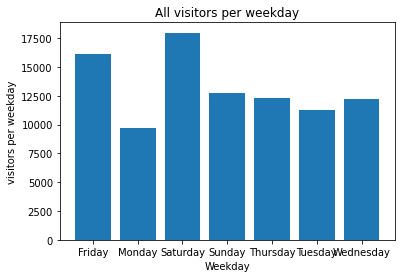

In [20]:
#total visitors per weekday

air_visit_visitors_PerDay["weekday"]=air_visit_visitors_PerDay["visit_date"].apply(lambda x: x.weekday())

b =pd.DataFrame({"week" : ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
"weekday" : [0,1,2,3,4,5,6]})
b.index +=1

air_visit_visitors_PerDay= air_visit_visitors_PerDay.merge(b,on="weekday")

x=pd.DataFrame(air_visit_visitors_PerDay.groupby("week")["visitors"].median()).reset_index()

pyplot.bar(x["week"],x["visitors"])
pyplot.xlabel("Weekday")
pyplot.ylabel("visitors per weekday")
pyplot.title("All visitors per weekday")
pyplot.show()

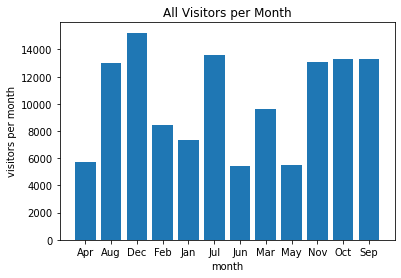

In [21]:
#visitors grouped by month

air_visit_visitors_PerDay["month"]=air_visit_visitors_PerDay["visit_date"].dt.month
c =pd.DataFrame({"Month" : ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
"month" : [1,2,3,4,5,6,7,8,9,10,11,12]})
c.index+=1
air_visit_visitors_PerDay = air_visit_visitors_PerDay.merge(c)

del air_visit_visitors_PerDay["month"]
del air_visit_visitors_PerDay["weekday"]

z=pd.DataFrame(air_visit_visitors_PerDay.groupby("Month")["visitors"].median()).reset_index()

pyplot.bar(z["Month"],z["visitors"])
pyplot.xlabel("month")
pyplot.ylabel("visitors per month")
pyplot.title("All Visitors per Month")
pyplot.show()

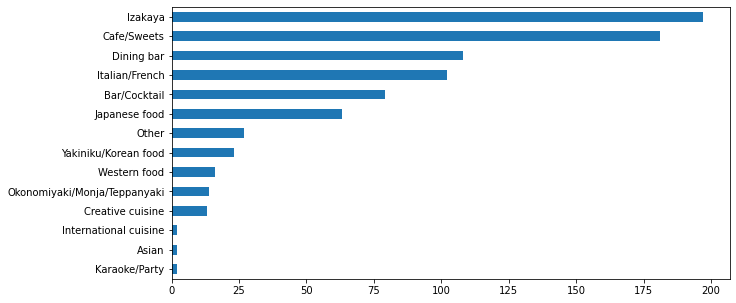

In [22]:
#getting the most popular genre
gen=airst['air_genre_name'].value_counts()
gen.sort_values().plot(kind='barh',figsize=(10,5))

In [23]:
train.rename(columns={'visit_date':'date'},inplace='True')
date['date']=date['calendar_date']
date.drop({'calendar_date'},axis=1,inplace=True)

datemerge = pd.merge(date,train,on='date')

datemerge['id'] = datemerge['air_store_id'].map(str)+ '_' + datemerge['date'].map(str)
datemerge['month']=pd.DatetimeIndex(datemerge['date']).month
datemerge['weekday']=pd.DatetimeIndex(datemerge['date']).weekday
datemerge['year']=pd.DatetimeIndex(datemerge['date']).year

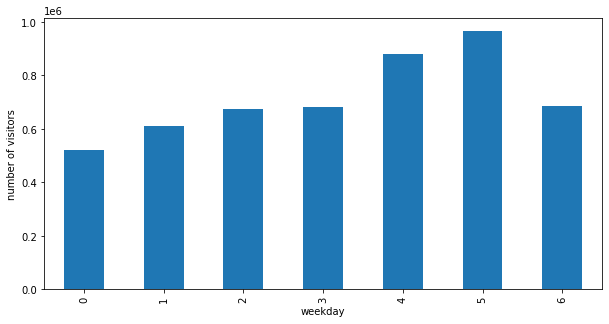

In [24]:
#calculating the count of visitors each weekday.

d=datemerge.groupby('weekday')['visitors'].sum()
d.plot(kind='bar',figsize=(10,5),ylabel="number of visitors")

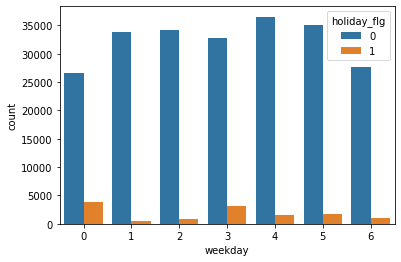

In [25]:
#holiday flag
te=datemerge.groupby('weekday')['holiday_flg'].sum()
sns.countplot(x='weekday',hue='holiday_flg',data=datemerge)

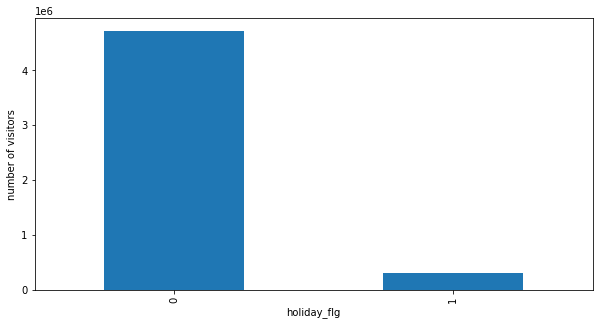

In [26]:
te=datemerge.groupby('holiday_flg')['visitors'].sum()
te.plot(kind='bar',figsize=(10,5),ylabel='number of visitors')

In [27]:
air = pd.merge(airre,airst,on='air_store_id')


air["visit_datetime"]= pd.to_datetime(air["visit_datetime"])
air["visit_date"] = air["visit_datetime"].dt.date
air["visit_date"] = pd.to_datetime(air["visit_date"])
air['DayofWeek'] = air['visit_date'].dt.dayofweek
air['year'] = air['visit_date'].dt.year
air['month'] = air['visit_date'].dt.month
air['visit_date'] = air['visit_date'].dt.date
air['id'] = air['air_store_id'].map(str) + '_' + air['visit_date'].map(str)

air

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visit_date,DayofWeek,year,month,id
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,4,2016,1,air_877f79706adbfb06_2016-01-01
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,4,2016,1,air_877f79706adbfb06_2016-01-01
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-02,5,2016,1,air_877f79706adbfb06_2016-01-02
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-02,5,2016,1,air_877f79706adbfb06_2016-01-02
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-08,4,2016,1,air_877f79706adbfb06_2016-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92373,air_b3a824511477a4ed,2017-05-16 19:00:00,2017-04-20 19:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2017-05-16,1,2017,5,air_b3a824511477a4ed_2017-05-16
92374,air_b3a824511477a4ed,2017-05-21 18:00:00,2017-04-20 19:00:00,4,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2017-05-21,6,2017,5,air_b3a824511477a4ed_2017-05-21
92375,air_b3a824511477a4ed,2017-05-21 19:00:00,2017-04-20 19:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2017-05-21,6,2017,5,air_b3a824511477a4ed_2017-05-21
92376,air_cf2229e64408d9fe,2017-04-20 23:00:00,2017-04-20 10:00:00,2,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,2017-04-20,3,2017,4,air_cf2229e64408d9fe_2017-04-20


In [28]:
tem=pd.merge(datemerge,air,on='id')
#tem.drop({'air_store_id_y','visit_datetime','day_of_week','year','month','air_area_name'},axis=1,inplace=True)
tem.rename(columns={'air_store_id_x':'air_store_id'},inplace='True')
tem

,day_of_week,holiday_flg,date,air_store_id,visitors,id,month_x,weekday,year_x,air_store_id_y,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,visit_date,DayofWeek,year_y,month_y
0,Friday,1,2016-01-01,air_db4b38ebe7a7ceff,21,air_db4b38ebe7a7ceff_2016-01-01,1,4,2016,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,2016-01-01,4,2016,1
1,Friday,1,2016-01-01,air_db4b38ebe7a7ceff,21,air_db4b38ebe7a7ceff_2016-01-01,1,4,2016,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,2016-01-01,4,2016,1
2,Friday,1,2016-01-01,air_877f79706adbfb06,3,air_877f79706adbfb06_2016-01-01,1,4,2016,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,4,2016,1
3,Friday,1,2016-01-01,air_877f79706adbfb06,3,air_877f79706adbfb06_2016-01-01,1,4,2016,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01,4,2016,1
4,Friday,1,2016-01-01,air_db80363d35f10926,8,air_db80363d35f10926_2016-01-01,1,4,2016,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,2016-01-01,4,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80357,Friday,0,2017-04-07,air_df554c4527a1cfe6,55,air_df554c4527a1cfe6_2017-04-07,4,4,2017,air_df554c4527a1cfe6,2017-04-07 20:00:00,2017-03-27 20:00:00,3,Izakaya,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,2017-04-07,4,2017,4
80358,Friday,0,2017-04-07,air_28064154614b2e6c,25,air_28064154614b2e6c_2017-04-07,4,4,2017,air_28064154614b2e6c,2017-04-07 20:00:00,2017-03-29 15:00:00,15,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,2017-04-07,4,2017,4
80359,Friday,0,2017-04-07,air_fc477473134e9ae5,12,air_fc477473134e9ae5_2017-04-07,4,4,2017,air_fc477473134e9ae5,2017-04-07 21:00:00,2017-03-31 19:00:00,12,Bar/Cocktail,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956,2017-04-07,4,2017,4
80360,Friday,0,2017-04-07,air_324f7c39a8410e7c,12,air_324f7c39a8410e7c_2017-04-07,4,4,2017,air_324f7c39a8410e7c,2017-04-07 20:00:00,2017-04-05 18:00:00,2,Izakaya,Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike,34.756950,134.841177,2017-04-07,4,2017,4


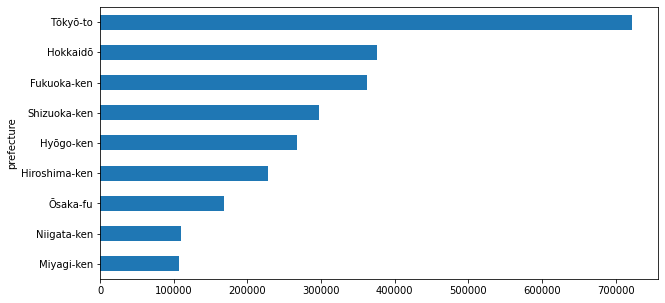

In [29]:
#getting the area with maximum number of visitors
tem['prefecture']=tem['air_area_name'].str.split().str[0]
tem['city']=tem['air_area_name'].str.split().str[1]
tem['area']=tem['air_area_name'].str.split().str[2]

A=tem.groupby('prefecture')['visitors'].sum()
A.sort_values().plot(kind='barh',figsize=(10,5),ylabel="number of visitors")

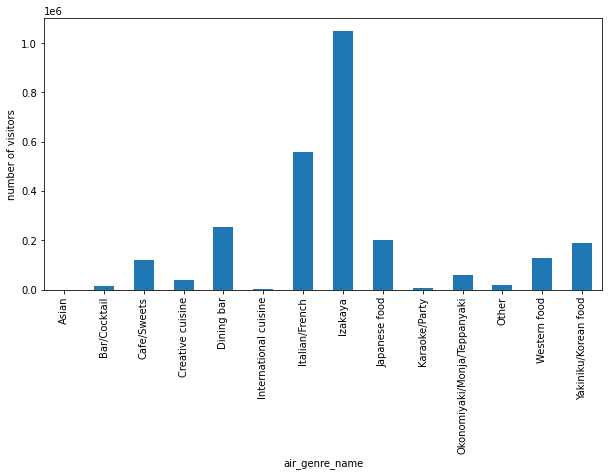

In [30]:
#number of visitors by genre name
A=tem.groupby('air_genre_name')['visitors'].sum()
A.plot(kind='bar',figsize=(10,5),ylabel="number of visitors")

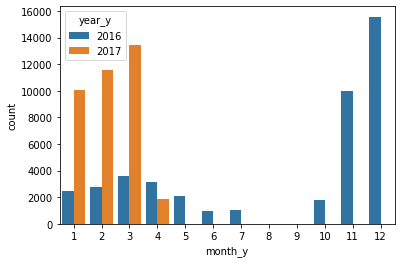

In [31]:
my = sns.countplot(x='month_y',hue="year_y", data=tem)

**Merging datasets**

In [32]:
#dividing area name into three components - 1. Prefecture 2. City 3. Area

airst['prefecture']=airst['air_area_name'].str.split().str[0]
airst['city']=airst['air_area_name'].str.split().str[1]
airst['area']=airst['air_area_name'].str.split().str[2]
airst

,air_store_id,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Hyōgo-ken,Kōbe-shi,Kumoidōri
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
...,...,...,...,...,...,...,...,...
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956,Hokkaidō,Sapporo-shi,Minami


In [33]:
#date['date']=date['calendar_date']
#date.drop({'calendar_date'},axis=1,inplace=True)

In [34]:
#train.rename(columns={'visit_date':'date'},inplace='True')

In [35]:
#merging date with training data to get number of visitors each day.

#datemerge = pd.merge(date,train,on='date')

In [36]:
#datemerge['id'] = datemerge['air_store_id'].map(str)+ '_' + datemerge['date'].map(str)
#datemerge['month']=pd.DatetimeIndex(datemerge['date']).month
#datemerge['weekday']=pd.DatetimeIndex(datemerge['date']).weekday
#datemerge['year']=pd.DatetimeIndex(datemerge['date']).year

In [37]:
datemerge.drop({'day_of_week'},axis=1,inplace=True)

In [38]:
datemerge

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016
...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017
239671,0,2017-04-07,air_848616680ef061bd,32,air_848616680ef061bd_2017-04-07,4,4,2017


In [39]:
train["date"] = pd.to_datetime(train["date"])
train['DayofWeek'] = train['date'].dt.dayofweek
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['date'] = train['date'].dt.date
train

,air_store_id,date,visitors,DayofWeek,year,month
0,air_e3020992d5fe5dfd,2016-07-01,21,4,2016,7
1,air_e3020992d5fe5dfd,2016-07-02,19,5,2016,7
2,air_e3020992d5fe5dfd,2016-07-04,8,0,2016,7
3,air_e3020992d5fe5dfd,2016-07-05,11,1,2016,7
4,air_e3020992d5fe5dfd,2016-07-06,16,2,2016,7
...,...,...,...,...,...,...
239668,air_4ce7b17062a1bf73,2017-03-30,15,3,2017,3
239669,air_4ce7b17062a1bf73,2017-03-31,14,4,2017,3
239670,air_4ce7b17062a1bf73,2017-04-01,9,5,2017,4
239671,air_4ce7b17062a1bf73,2017-04-03,11,0,2017,4


In [40]:
#merging air store info with date info

temp=datemerge.merge(airst,on=['air_store_id'],how='left')
temp

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016,Western food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,Tōkyō-to,Nakano-ku,Nakano
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016,Bar/Cocktail,Ōsaka-fu Neyagawa-shi Honmachi,34.766093,135.628100,Ōsaka-fu,Neyagawa-shi,Honmachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017,Bar/Cocktail,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,Tōkyō-to,Shinjuku-ku,Kabukichō
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017,Cafe/Sweets,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,Hyōgo-ken,Kōbe-shi,Sumiyoshi
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017,Yakiniku/Korean food,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi
239671,0,2017-04-07,air_848616680ef061bd,32,air_848616680ef061bd_2017-04-07,4,4,2017,Cafe/Sweets,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,Tōkyō-to,Suginami-ku,Asagayaminami


In [41]:
#formatting the submission dataset

sub["visit_date"]=sub["id"].map(lambda x: str(x).split("_")[2])
sub["air_store_id"]=sub["id"].map(lambda x: "_".join(x.split("_")[:2]))

In [42]:
#creating a new dataset by taking air store ids and day of week as this is an important feature

distinct_stores=sub["air_store_id"].unique()
stores=pd.concat([pd.DataFrame({"air_store_id":distinct_stores,"DayofWeek":[i]*len(distinct_stores)}) for i in range(7)],axis=0,ignore_index=True).reset_index(drop=True)

In [43]:
#taking mean, median, count, minimum, maximum of number of visitors according to day of week

t = train.groupby(["air_store_id","DayofWeek"],as_index=False)["visitors"].min().rename(columns={"visitors":"min_visitors"})
stores=pd.merge(stores,t,how="left",on=["air_store_id","DayofWeek"])

t = train.groupby(["air_store_id","DayofWeek"],as_index=False)["visitors"].mean().rename(columns={"visitors":"mean_visitors"})
stores= pd.merge(stores,t,how="left",on=["air_store_id","DayofWeek"])

t = train.groupby(["air_store_id","DayofWeek"],as_index=False)["visitors"].median().rename(columns={"visitors":"median_visitors"})
stores= pd.merge(stores,t,how="left",on=["air_store_id","DayofWeek"])

t = train.groupby(["air_store_id","DayofWeek"],as_index=False)["visitors"].max().rename(columns={"visitors":"max_visitors"})
stores= pd.merge(stores,t,how="left",on=["air_store_id","DayofWeek"])

t = train.groupby(["air_store_id","DayofWeek"],as_index=False)["visitors"].count().rename(columns={"visitors":"count_visitors"})
stores= pd.merge(stores,t,how="left",on=["air_store_id","DayofWeek"])

In [44]:
stores = stores.rename(columns={'DayofWeek':'weekday'})
stores

,air_store_id,weekday,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors
0,air_e3020992d5fe5dfd,0,2.0,9.933333,10.0,22.0,30.0
1,air_81c5dff692063446,0,2.0,12.451613,9.0,63.0,31.0
2,air_ad7777590c884721,0,3.0,7.000000,7.0,11.0,2.0
3,air_d63cfa6d6ab78446,0,8.0,17.000000,17.0,25.0,13.0
4,air_ced6297e5bdf5130,0,2.0,25.355556,26.0,37.0,45.0
...,...,...,...,...,...,...,...
5798,air_848616680ef061bd,6,19.0,40.384615,37.0,75.0,39.0
5799,air_3bd49f98ab7f36ab,6,1.0,7.552632,7.0,23.0,38.0
5800,air_383f5b2f8d345a49,6,3.0,13.909091,11.0,48.0,66.0
5801,air_2545dd3a00f265e2,6,23.0,45.205128,41.0,77.0,39.0


In [45]:
#merging this new dataset with the initially merged dataset.

full=pd.merge(temp,stores,how="left",on=["air_store_id","weekday"])
full

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,2.0,15.939394,15.0,44.0,66.0
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016,Western food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya,1.0,29.803030,31.5,57.0,66.0
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,Tōkyō-to,Nakano-ku,Nakano,2.0,11.522388,10.0,40.0,67.0
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,13.0,41.313433,43.0,86.0,67.0
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016,Bar/Cocktail,Ōsaka-fu Neyagawa-shi Honmachi,34.766093,135.628100,Ōsaka-fu,Neyagawa-shi,Honmachi,1.0,4.196429,3.0,13.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017,Bar/Cocktail,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,Tōkyō-to,Shinjuku-ku,Kabukichō,3.0,7.875000,7.0,17.0,40.0
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017,Cafe/Sweets,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,Hyōgo-ken,Kōbe-shi,Sumiyoshi,1.0,8.238806,8.0,17.0,67.0
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017,Yakiniku/Korean food,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,8.0,24.375000,25.0,38.0,40.0
239671,0,2017-04-07,air_848616680ef061bd,32,air_848616680ef061bd_2017-04-07,4,4,2017,Cafe/Sweets,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,Tōkyō-to,Suginami-ku,Asagayaminami,13.0,25.487805,26.0,61.0,41.0


### Adding some new features

In [46]:
#standard deviation of number of visitors grouped by prefecture.
pre_std = full.groupby('prefecture').agg({'visitors': 'std'})
pre_std = pre_std.rename(columns={'visitors':'pre_std_visitor'})
pre_std = pre_std.reset_index()

In [47]:
#mean of number of visitors grouped by prefecture.
pre_mean = full.groupby('prefecture').agg({'visitors': 'mean'})
pre_mean = pre_mean.reset_index()
pre_mean = pre_mean.rename(columns={'visitors':'pre_avg_visitor'})

In [48]:
#mean of number of visitors grouped by genre.
gen_mean = full.groupby('air_genre_name').agg({'visitors': 'mean'})
gen_mean = gen_mean.rename(columns={'visitors':'gen_avg_visitor'})
gen_mean = gen_mean.reset_index()

In [49]:
#standard deviation of number of visitors grouped by genre.
gen_std = full.groupby('air_genre_name').agg({'visitors': 'std'})
gen_std = gen_std.rename(columns={'visitors':'gen_std_visitor'})
gen_std = gen_std.reset_index()

In [50]:
#standard deviation of number of visitors grouped by city.
city_std = full.groupby('city').agg({'visitors': 'std'})
city_std = city_std.rename(columns={'visitors':'city_std_visitor'})
city_std = city_std.reset_index()

In [51]:
#mean of number of visitors grouped by city.
city_mean = full.groupby('city').agg({'visitors': 'mean'})
city_mean = city_mean.rename(columns={'visitors':'city_avg_visitor'})
city_mean = city_mean.reset_index()

In [52]:
#standard deviation of number of visitors grouped by area
area_std = full.groupby('area').agg({'visitors': 'std'})
area_std = area_std.rename(columns={'visitors':'area_std_visitor'})
area_std = area_std.reset_index()

In [53]:
#mean of number of visitors grouped by area.
area_mean = full.groupby('area').agg({'visitors': 'mean'})
area_mean = area_mean.rename(columns={'visitors':'area_avg_visitor'})
area_mean = area_mean.reset_index()

In [54]:
#merging these new features to our original set.
full=pd.merge(full,pre_std,how="left",on=["prefecture"])
full=pd.merge(full,pre_mean,how="left",on=["prefecture"])
full=pd.merge(full,gen_mean,how="left",on=["air_genre_name"])
full=pd.merge(full,gen_std,how="left",on=["air_genre_name"])
full=pd.merge(full,city_std,how="left",on=["city"])
full=pd.merge(full,city_mean,how="left",on=["city"])
full=pd.merge(full,area_mean,how='left',on=['area'])
full=pd.merge(full,area_std,how='left',on=['area'])
full

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,2.0,15.939394,15.0,44.0,66.0,16.860579,21.371563,18.745333,15.979021,16.688917,22.297564,20.119833,15.355493
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016,Western food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya,1.0,29.803030,31.5,57.0,66.0,16.288178,20.430290,22.286880,16.236670,16.971373,20.966339,21.140517,16.660715
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,Tōkyō-to,Nakano-ku,Nakano,2.0,11.522388,10.0,40.0,67.0,16.288178,20.430290,13.298205,13.357582,13.180010,15.905319,15.905319,13.180010
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,13.0,41.313433,43.0,86.0,67.0,16.863930,20.459963,23.080782,17.019229,16.681710,20.814866,20.655009,16.857619
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016,Bar/Cocktail,Ōsaka-fu Neyagawa-shi Honmachi,34.766093,135.628100,Ōsaka-fu,Neyagawa-shi,Honmachi,1.0,4.196429,3.0,13.0,56.0,16.860579,21.371563,13.298205,13.357582,4.187146,6.148410,6.148410,4.187146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017,Bar/Cocktail,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,Tōkyō-to,Shinjuku-ku,Kabukichō,3.0,7.875000,7.0,17.0,40.0,16.288178,20.430290,13.298205,13.357582,15.888736,18.719631,19.604174,16.327210
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017,Cafe/Sweets,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,Hyōgo-ken,Kōbe-shi,Sumiyoshi,1.0,8.238806,8.0,17.0,67.0,16.279643,23.263198,22.568583,17.255694,14.909096,21.561007,23.542069,15.573281
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017,Yakiniku/Korean food,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,8.0,24.375000,25.0,38.0,40.0,16.860579,21.371563,21.188772,14.445954,16.688917,22.297564,20.119833,15.355493
239671,0,2017-04-07,air_848616680ef061bd,32,air_848616680ef061bd_2017-04-07,4,4,2017,Cafe/Sweets,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,Tōkyō-to,Suginami-ku,Asagayaminami,13.0,25.487805,26.0,61.0,41.0,16.288178,20.430290,22.568583,17.255694,12.485537,17.370032,17.370032,12.485537


## MODEL 1- LINEAR REGRESSION

**Encoding the Categorical Features**

In [55]:
#one hot encoding

g = pd.get_dummies(full.air_genre_name, prefix='G')
c = pd.get_dummies(full.city, prefix='C')
p = pd.get_dummies(full.prefecture, prefix='P')
a = pd.get_dummies(full.area,prefix='A')

In [56]:
final1 = pd.concat([full,g,c,p,a], axis=1, sort=False)

In [57]:
del final1['air_genre_name']
del final1['prefecture']
del final1['city']
del final1['area']

In [58]:
#final dataset for training the model

final1

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year,air_area_name,latitude,longitude,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,G_Asian,G_Bar/Cocktail,G_Cafe/Sweets,G_Creative cuisine,G_Dining bar,G_International cuisine,G_Italian/French,G_Izakaya,G_Japanese food,G_Karaoke/Party,G_Okonomiyaki/Monja/Teppanyaki,G_Other,G_Western food,G_Yakiniku/Korean food,C_Abashiri-shi,C_Adachi-ku,...,A_Morino,A_Motomachi,A_Motomachidōri,A_Motoshirochō,A_Nagarekawachō,A_Nakano,A_Nakanochō,A_Nanbasennichimae,A_Nishiikebukuro,A_Nishishinjuku,A_None,A_Okusawa,A_Rokutanjichō,A_Roppongi,A_Sangenjaya,A_Sendagi,A_Setagaya,A_Shibakōen,A_Shibuya,A_Shinmachi,A_Shiobaru,A_Sugamo,A_Sumiyoshi,A_Takaban,A_Takatori,A_Tateishi,A_Tenjin,A_Teraohigashi,A_Tomioka,A_Torikai,A_Toyotamakita,A_Tsukiji,A_Tōyō,A_Tōyōchō,A_Yasuda,A_Ōgimachi,A_Ōhiraki,A_Ōjihonchō,A_Ōtedōri,A_Ōtemachi
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,2.0,15.939394,15.0,44.0,66.0,16.860579,21.371563,18.745333,15.979021,16.688917,22.297564,20.119833,15.355493,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,1.0,29.803030,31.5,57.0,66.0,16.288178,20.430290,22.286880,16.236670,16.971373,20.966339,21.140517,16.660715,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,2.0,11.522388,10.0,40.0,67.0,16.288178,20.430290,13.298205,13.357582,13.180010,15.905319,15.905319,13.180010,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,13.0,41.313433,43.0,86.0,67.0,16.863930,20.459963,23.080782,17.019229,16.681710,20.814866,20.655009,16.857619,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016,Ōsaka-fu Neyagawa-shi Honmachi,34.766093,135.628100,1.0,4.196429,3.0,13.0,56.0,16.860579,21.371563,13.298205,13.357582,4.187146,6.148410,6.148410,4.187146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,3.0,7.875000,7.0,17.0,40.0,16.288178,20.430290,13.298205,13.357582,15.888736,18.719631,19.604174,16.327210,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,1.0,8.238806,8.0,17.0,67.0,16.279643,23.263198,22.568583,17.255694,14.909096,21.561007,23.542069,15.573281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,8.0,24.375000,25.0,3

Formating the test dataset similarly

In [59]:
test1=sub

In [60]:
test1["visit_date"] = pd.to_datetime(test["visit_date"])
test1["visit_weekday"] = test1["visit_date"].dt.dayofweek

In [61]:
date["visit_date"] = pd.to_datetime(date["date"])
date

,day_of_week,holiday_flg,date,visit_date
0,Friday,1,2016-01-01,2016-01-01
1,Saturday,1,2016-01-02,2016-01-02
2,Sunday,1,2016-01-03,2016-01-03
3,Monday,0,2016-01-04,2016-01-04
4,Tuesday,0,2016-01-05,2016-01-05
...,...,...,...,...
512,Saturday,0,2017-05-27,2017-05-27
513,Sunday,0,2017-05-28,2017-05-28
514,Monday,0,2017-05-29,2017-05-29
515,Tuesday,0,2017-05-30,2017-05-30


In [62]:
test1 = pd.merge(test1,date,how="left",on=["visit_date"])
test1

,id,visitors,visit_date,air_store_id,visit_weekday,day_of_week,holiday_flg,date
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3,Thursday,0,2017-04-06
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4,Friday,0,2017-04-07
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5,Saturday,0,2017-04-08
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0,Monday,0,2017-04-10
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1,Tuesday,0,2017-04-11
...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1,Tuesday,0,2017-04-18
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2,Wednesday,0,2017-04-19
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3,Thursday,0,2017-04-20
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4,Friday,0,2017-04-21


In [63]:
del test1['day_of_week']

In [64]:
test1 = pd.merge(test1,airst,how="left",on=["air_store_id"])
test1

,id,visitors,visit_date,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen


In [65]:
test1.drop({'air_area_name','visit_date'},axis=1,inplace=True)

In [66]:
test1=pd.merge(test1,pre_std,how="left",on=["prefecture"])
test1=pd.merge(test1,pre_mean,how="left",on=["prefecture"])
test1=pd.merge(test1,gen_mean,how="left",on=["air_genre_name"])
test1=pd.merge(test1,gen_std,how="left",on=["air_genre_name"])
test1=pd.merge(test1,city_std,how="left",on=["city"])
test1=pd.merge(test1,city_mean,how="left",on=["city"])
test1=pd.merge(test1,area_mean,how='left',on=['area'])
test1=pd.merge(test1,area_std,how='left',on=['area'])
test1

,id,visitors,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230


In [67]:
test1["date"] = pd.to_datetime(test1["date"])
test1['year'] = test1['date'].dt.year
test1['month'] = test1['date'].dt.month
test1['date'] = test1['date'].dt.date

In [68]:
test1

,id,visitors,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4


In [69]:
#encoding the test dataset

g1 = pd.get_dummies(test1.air_genre_name, prefix='G')
c1 = pd.get_dummies(test1.city, prefix='C')
p1 = pd.get_dummies(test1.prefecture, prefix='P')
a1 = pd.get_dummies(test1.area,prefix='A')

In [70]:
test1 = pd.concat([test1,g1,c1,p1,a1], axis=1, sort=False)

In [71]:
del test1['prefecture']
del test1['air_genre_name']
del test1['city']
del test1['area']

In [72]:
test1 = test1.rename(columns={'visit_weekday':'weekday'})
test1

,id,visitors,air_store_id,weekday,holiday_flg,date,latitude,longitude,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month,G_Asian,G_Bar/Cocktail,G_Cafe/Sweets,G_Creative cuisine,G_Dining bar,G_International cuisine,G_Italian/French,G_Izakaya,G_Japanese food,G_Karaoke/Party,G_Okonomiyaki/Monja/Teppanyaki,G_Other,G_Western food,G_Yakiniku/Korean food,C_Abashiri-shi,C_Adachi-ku,C_Amagasaki-shi,C_Asahikawa-shi,C_Bunkyō-ku,C_Chiyoda-ku,C_Chūō-ku,C_Edogawa-ku,...,A_Morino,A_Motomachi,A_Motomachidōri,A_Motoshirochō,A_Nagarekawachō,A_Nakano,A_Nakanochō,A_Nanbasennichimae,A_Nishiikebukuro,A_Nishishinjuku,A_None,A_Okusawa,A_Rokutanjichō,A_Roppongi,A_Sangenjaya,A_Sendagi,A_Setagaya,A_Shibakōen,A_Shibuya,A_Shinmachi,A_Shiobaru,A_Sugamo,A_Sumiyoshi,A_Takaban,A_Takatori,A_Tateishi,A_Tenjin,A_Teraohigashi,A_Tomioka,A_Torikai,A_Toyotamakita,A_Tsukiji,A_Tōyō,A_Tōyōchō,A_Yasuda,A_Ōgimachi,A_Ōhiraki,A_Ōjihonchō,A_Ōtedōri,A_Ōtemachi
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0

In [73]:
test1 = pd.merge(test1,stores,how="left",on=["air_store_id","weekday"])
test1

,id,visitors,air_store_id,weekday,holiday_flg,date,latitude,longitude,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month,G_Asian,G_Bar/Cocktail,G_Cafe/Sweets,G_Creative cuisine,G_Dining bar,G_International cuisine,G_Italian/French,G_Izakaya,G_Japanese food,G_Karaoke/Party,G_Okonomiyaki/Monja/Teppanyaki,G_Other,G_Western food,G_Yakiniku/Korean food,C_Abashiri-shi,C_Adachi-ku,C_Amagasaki-shi,C_Asahikawa-shi,C_Bunkyō-ku,C_Chiyoda-ku,C_Chūō-ku,C_Edogawa-ku,...,A_Nakano,A_Nakanochō,A_Nanbasennichimae,A_Nishiikebukuro,A_Nishishinjuku,A_None,A_Okusawa,A_Rokutanjichō,A_Roppongi,A_Sangenjaya,A_Sendagi,A_Setagaya,A_Shibakōen,A_Shibuya,A_Shinmachi,A_Shiobaru,A_Sugamo,A_Sumiyoshi,A_Takaban,A_Takatori,A_Tateishi,A_Tenjin,A_Teraohigashi,A_Tomioka,A_Torikai,A_Toyotamakita,A_Tsukiji,A_Tōyō,A_Tōyōchō,A_Yasuda,A_Ōgimachi,A_Ōhiraki,A_Ōjihonchō,A_Ōtedōri,A_Ōtemachi,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,10.857143,8.0,27.0,35.0
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,15.925000,18.0,25.0,40.0
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,13.405405,14.0,30.0,37.0
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,9.933333,10.0,22.0,30.0
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,35.670651,139.771861,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0,11.157895,10.5,24.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,6.948276,6.0,21.0,58.0
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,8.016393,7.0,22.0,61.0
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,35.658068,139.751599,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,7.885246,7.0,21.0,61.0
12433,air_4ce7b17062a1bf73_2017-04-21,0

### MODEL TRAINING

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [75]:
final1.drop({'air_area_name'},axis=1,inplace=True)

In [76]:
y1=final1['visitors']

In [77]:
#removing all the columns that are not integer or float
#id, store_id is string
#date is date format
#visitors is our target variable

col = [c for c in test1 if c not in ['id', 'air_store_id', 'date','visitors']]
col

['weekday',
 'holiday_flg',
 'latitude',
 'longitude',
 'pre_std_visitor',
 'pre_avg_visitor',
 'gen_avg_visitor',
 'gen_std_visitor',
 'city_std_visitor',
 'city_avg_visitor',
 'area_avg_visitor',
 'area_std_visitor',
 'year',
 'month',
 'G_Asian',
 'G_Bar/Cocktail',
 'G_Cafe/Sweets',
 'G_Creative cuisine',
 'G_Dining bar',
 'G_International cuisine',
 'G_Italian/French',
 'G_Izakaya',
 'G_Japanese food',
 'G_Karaoke/Party',
 'G_Okonomiyaki/Monja/Teppanyaki',
 'G_Other',
 'G_Western food',
 'G_Yakiniku/Korean food',
 'C_Abashiri-shi',
 'C_Adachi-ku',
 'C_Amagasaki-shi',
 'C_Asahikawa-shi',
 'C_Bunkyō-ku',
 'C_Chiyoda-ku',
 'C_Chūō-ku',
 'C_Edogawa-ku',
 'C_Fuchū-shi',
 'C_Fukuoka-shi',
 'C_Fukuyama-shi',
 'C_Hamamatsu-shi',
 'C_Higashiōsaka-shi',
 'C_Himeji-shi',
 'C_Hiroshima-shi',
 'C_Itabashi-ku',
 'C_Itoshima-shi',
 'C_Kakogawa-shi',
 'C_Kashiwazaki-shi',
 'C_Katsushika-ku',
 'C_Katō-gun',
 'C_Kita-ku',
 'C_Kitakyūshū-shi',
 'C_Koganei-shi',
 'C_Kurume-shi',
 'C_Kōbe-shi',
 'C_Kōt

In [78]:
#filling the null values

final1 = final1.fillna(-1)
test1 = test1.fillna(-1)

In [79]:
#fitting the linear regression model

lm.fit(final1[col], np.log1p(final1['visitors'].values))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#predicting the values

predict1 = lm.predict(test1[col])

In [81]:
predict1=pd.DataFrame(predict1)

In [82]:
predict1[0] = np.expm1(predict1[0]).clip(lower=0.)

In [83]:
predict1

,0
0,9.086725
1,12.688939
2,10.847233
3,8.834705
4,9.601024
...,...
12430,7.875008
12431,8.410794
12432,8.369569
12433,9.162303


In [84]:
predict1.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict1.csv')

# MODEL-2 kNN

In [118]:
from sklearn import neighbors
model2= neighbors.KNeighborsRegressor(n_jobs=-1,n_neighbors=4)

#training the model
model2.fit(final1[col], np.log1p(final1['visitors'].values))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                    weights='uniform')

In [124]:
predict2 = model2.predict(test1[col])

In [140]:
prediction2 = pd.DataFrame(predict2)
prediction2 = np.expm1(prediction2).clip(lower=0.)

In [141]:
prediction2

,0
0,15.100610
1,13.831171
2,11.876260
3,12.886006
4,14.101048
...,...
12430,7.050305
12431,8.587127
12432,7.550810
12433,10.465314


In [126]:
prediction2.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict2.csv')

# MODEL-3 Light BGM

In [85]:
#final dataset for training

final2=full
final2

,holiday_flg,date,air_store_id,visitors,id,month,weekday,year,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor
0,1,2016-01-01,air_81c5dff692063446,7,air_81c5dff692063446_2016-01-01,1,4,2016,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,2.0,15.939394,15.0,44.0,66.0,16.860579,21.371563,18.745333,15.979021,16.688917,22.297564,20.119833,15.355493
1,1,2016-01-01,air_25d8e5cc57dd87d9,1,air_25d8e5cc57dd87d9_2016-01-01,1,4,2016,Western food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya,1.0,29.803030,31.5,57.0,66.0,16.288178,20.430290,22.286880,16.236670,16.971373,20.966339,21.140517,16.660715
2,1,2016-01-01,air_883ca28ef0ed3d55,4,air_883ca28ef0ed3d55_2016-01-01,1,4,2016,Bar/Cocktail,Tōkyō-to Nakano-ku Nakano,35.708146,139.666288,Tōkyō-to,Nakano-ku,Nakano,2.0,11.522388,10.0,40.0,67.0,16.288178,20.430290,13.298205,13.357582,13.180010,15.905319,15.905319,13.180010
3,1,2016-01-01,air_cb7467aed805e7fe,33,air_cb7467aed805e7fe_2016-01-01,1,4,2016,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813,Fukuoka-ken,Fukuoka-shi,Daimyō,13.0,41.313433,43.0,86.0,67.0,16.863930,20.459963,23.080782,17.019229,16.681710,20.814866,20.655009,16.857619
4,1,2016-01-01,air_1f7f8fa557bc0d55,6,air_1f7f8fa557bc0d55_2016-01-01,1,4,2016,Bar/Cocktail,Ōsaka-fu Neyagawa-shi Honmachi,34.766093,135.628100,Ōsaka-fu,Neyagawa-shi,Honmachi,1.0,4.196429,3.0,13.0,56.0,16.860579,21.371563,13.298205,13.357582,4.187146,6.148410,6.148410,4.187146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,0,2017-04-07,air_dabfbd0ec951925a,6,air_dabfbd0ec951925a_2017-04-07,4,4,2017,Bar/Cocktail,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549,Tōkyō-to,Shinjuku-ku,Kabukichō,3.0,7.875000,7.0,17.0,40.0,16.288178,20.430290,13.298205,13.357582,15.888736,18.719631,19.604174,16.327210
239669,0,2017-04-07,air_d0e8a085d8dc83aa,10,air_d0e8a085d8dc83aa_2017-04-07,4,4,2017,Cafe/Sweets,Hyōgo-ken Kōbe-shi Sumiyoshi Higashimachi,34.720228,135.265455,Hyōgo-ken,Kōbe-shi,Sumiyoshi,1.0,8.238806,8.0,17.0,67.0,16.279643,23.263198,22.568583,17.255694,14.909096,21.561007,23.542069,15.573281
239670,0,2017-04-07,air_2bffb19a24d11729,14,air_2bffb19a24d11729_2017-04-07,4,4,2017,Yakiniku/Korean food,Ōsaka-fu Ōsaka-shi Ōgimachi,34.705362,135.510025,Ōsaka-fu,Ōsaka-shi,Ōgimachi,8.0,24.375000,25.0,38.0,40.0,16.860579,21.371563,21.188772,14.445954,16.688917,22.297564,20.119833,15.355493
239671,0,2017-04-07,air_848616680ef061bd,32,air_848616680ef061bd_2017-04-07,4,4,2017,Cafe/Sweets,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438,Tōkyō-to,Suginami-ku,Asagayaminami,13.0,25.487805,26.0,61.0,41.0,16.288178,20.430290,22.568583,17.255694,12.485537,17.370032,17.370032,12.485537


In [86]:
#setting up the test dataset similarly

test2=sub
test2

,id,visitors,visit_date,air_store_id,visit_weekday
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1
...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4


In [87]:
test2["visit_date"] = pd.to_datetime(test2["visit_date"])

In [88]:
test2 = pd.merge(test2,date,how="left",on=["visit_date"])
test2

,id,visitors,visit_date,air_store_id,visit_weekday,day_of_week,holiday_flg,date
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3,Thursday,0,2017-04-06
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4,Friday,0,2017-04-07
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5,Saturday,0,2017-04-08
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0,Monday,0,2017-04-10
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1,Tuesday,0,2017-04-11
...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1,Tuesday,0,2017-04-18
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2,Wednesday,0,2017-04-19
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3,Thursday,0,2017-04-20
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4,Friday,0,2017-04-21


In [89]:
del test2['day_of_week']
test2

,id,visitors,visit_date,air_store_id,visit_weekday,holiday_flg,date
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3,0,2017-04-06
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4,0,2017-04-07
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5,0,2017-04-08
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0,0,2017-04-10
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1,0,2017-04-11
...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1,0,2017-04-18
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2,0,2017-04-19
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3,0,2017-04-20
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4,0,2017-04-21


In [90]:
test2 = pd.merge(test2,airst,how="left",on=["air_store_id"])
test2

,id,visitors,visit_date,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,air_area_name,latitude,longitude,prefecture,city,area
0,air_e3020992d5fe5dfd_2017-04-06,0,2017-04-06,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
1,air_e3020992d5fe5dfd_2017-04-07,0,2017-04-07,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
2,air_e3020992d5fe5dfd_2017-04-08,0,2017-04-08,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
3,air_e3020992d5fe5dfd_2017-04-10,0,2017-04-10,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
4,air_e3020992d5fe5dfd_2017-04-11,0,2017-04-11,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,Tōkyō-to Chūō-ku Tsukiji,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,2017-04-18,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12431,air_4ce7b17062a1bf73_2017-04-19,0,2017-04-19,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12432,air_4ce7b17062a1bf73_2017-04-20,0,2017-04-20,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12433,air_4ce7b17062a1bf73_2017-04-21,0,2017-04-21,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen


In [91]:
test2.drop({'air_area_name','visit_date'},axis=1,inplace=True)
test2

,id,visitors,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji
...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen


In [92]:
test2=pd.merge(test2,pre_std,how="left",on=["prefecture"])
test2=pd.merge(test2,pre_mean,how="left",on=["prefecture"])
test2=pd.merge(test2,gen_mean,how="left",on=["air_genre_name"])
test2=pd.merge(test2,gen_std,how="left",on=["air_genre_name"])
test2=pd.merge(test2,city_std,how="left",on=["city"])
test2=pd.merge(test2,city_mean,how="left",on=["city"])
test2=pd.merge(test2,area_mean,how='left',on=['area'])
test2=pd.merge(test2,area_std,how='left',on=['area'])
test2

,id,visitors,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230


In [93]:
test2["date"] = pd.to_datetime(test2["date"])
test2['year'] = test2['date'].dt.year
test2['month'] = test2['date'].dt.month
test2['date'] = test2['date'].dt.date
test2

,id,visitors,air_store_id,visit_weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4


In [94]:
test2 = test2.rename(columns={'visit_weekday':'weekday'})
test2

,id,visitors,air_store_id,weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4


In [95]:
test2 = pd.merge(test2,stores,how="left",on=["air_store_id","weekday"])
test2

,id,visitors,air_store_id,weekday,holiday_flg,date,air_genre_name,latitude,longitude,prefecture,city,area,pre_std_visitor,pre_avg_visitor,gen_avg_visitor,gen_std_visitor,city_std_visitor,city_avg_visitor,area_avg_visitor,area_std_visitor,year,month,min_visitors,mean_visitors,median_visitors,max_visitors,count_visitors
0,air_e3020992d5fe5dfd_2017-04-06,0,air_e3020992d5fe5dfd,3,0,2017-04-06,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,2.0,10.857143,8.0,27.0,35.0
1,air_e3020992d5fe5dfd_2017-04-07,0,air_e3020992d5fe5dfd,4,0,2017-04-07,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,3.0,15.925000,18.0,25.0,40.0
2,air_e3020992d5fe5dfd_2017-04-08,0,air_e3020992d5fe5dfd,5,0,2017-04-08,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,2.0,13.405405,14.0,30.0,37.0
3,air_e3020992d5fe5dfd_2017-04-10,0,air_e3020992d5fe5dfd,0,0,2017-04-10,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,2.0,9.933333,10.0,22.0,30.0
4,air_e3020992d5fe5dfd_2017-04-11,0,air_e3020992d5fe5dfd,1,0,2017-04-11,Italian/French,35.670651,139.771861,Tōkyō-to,Chūō-ku,Tsukiji,16.288178,20.43029,22.553878,17.001454,16.118414,21.422259,22.240202,16.514067,2017,4,2.0,11.157895,10.5,24.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,0,air_4ce7b17062a1bf73,1,0,2017-04-18,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,1.0,6.948276,6.0,21.0,58.0
12431,air_4ce7b17062a1bf73_2017-04-19,0,air_4ce7b17062a1bf73,2,0,2017-04-19,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,1.0,8.016393,7.0,22.0,61.0
12432,air_4ce7b17062a1bf73_2017-04-20,0,air_4ce7b17062a1bf73,3,0,2017-04-20,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,1.0,7.885246,7.0,21.0,61.0
12433,air_4ce7b17062a1bf73_2017-04-21,0,air_4ce7b17062a1bf73,4,0,2017-04-21,Italian/French,35.658068,139.751599,Tōkyō-to,Minato-ku,Shibakōen,16.288178,20.43029,22.553878,17.001454,15.592389,19.723355,19.621851,15.766230,2017,4,1.0,9.250000,9.0,20.0,64.0


In [96]:
del final2['air_area_name']

In [97]:
y = final2['visitors']

In [98]:
test2 = test2.fillna(-1)
final2 = final2.fillna(-1)

In [99]:
categorical_feats={'air_genre_name','prefecture','area','city'}

In [100]:
col2 = [c for c in test2 if c not in ['id', 'air_store_id', 'date','visitors']]

In [101]:
import lightgbm as lgb

In [102]:
#tuning the hyper-parameters

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 15,  
    "max_bin": 256,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(final2[col2],final2['visitors'], test_size=0.2, random_state=42)

In [105]:
for c in categorical_feats:
    X_train[c] = X_train[c].astype('category')
    X_test[c] = X_test[c].astype('category')
    test2[c]=test2[c].astype('category')

In [106]:
#training the model

lgb_train = lgb.Dataset(X_train,np.log1p(y_train))

In [107]:
gbm = lgb.train(hyper_params, lgb_train, num_boost_round=10, verbose_eval=False)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [130]:
#predicting the values

predict3=gbm.predict(test2[col2])

In [139]:
prediction3

,0
0,9.266161
1,14.313300
2,11.315587
3,10.084535
4,8.667516
...,...
12430,5.509618
12431,6.865485
12432,6.542941
12433,9.682255


In [131]:
prediction3= pd.DataFrame(predict3)
prediction3[0] = np.expm1(prediction3[0])

In [132]:
prediction3.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict3.csv')

## MODEL-4 XGBoost

In [111]:
from xgboost import XGBRegressor

In [112]:
#tuning the hyper-parameters

model3= XGBRegressor(learning_rate=0.1, random_state=3, n_estimators=500, subsample=0.8,colsample_bytree=0.8, max_depth =10,n_jobs=-1)

In [113]:
#training the model

model3.fit(final1[col][150000:], np.log1p(final1['visitors'][150000:].values))

[12:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [127]:
#predicting the values

predict4 = model3.predict(test1[col])
prediction4 = pd.DataFrame(predict4)
prediction4 = np.expm1(prediction4).clip(lower=0.)

In [138]:
prediction4

,0
0,11.100348
1,14.512310
2,10.637817
3,9.573479
4,9.247967
...,...
12430,6.174608
12431,9.437828
12432,7.932053
12433,8.026381


In [115]:
prediction4.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict4.csv')

## **ENSEMBLING**


1. kNN AND XGBOOST

In [117]:
#we have already trained our models and made the predictions, now we will ensemble them.

In [129]:
ensem1 = test1[['id','visitors']].copy()
ensem1['visitors'] = 0.4*predict2+0.6*predict4
ensem1['visitors'] = np.expm1(ensem1['visitors']).clip(lower=0.)
ensem1

,id,visitors
0,air_e3020992d5fe5dfd_2017-04-06,12.564871
1,air_e3020992d5fe5dfd_2017-04-07,14.236180
2,air_e3020992d5fe5dfd_2017-04-08,11.118220
3,air_e3020992d5fe5dfd_2017-04-10,10.791300
4,air_e3020992d5fe5dfd_2017-04-11,10.967005
...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,6.512835
12431,air_4ce7b17062a1bf73_2017-04-19,9.088846
12432,air_4ce7b17062a1bf73_2017-04-20,7.777558
12433,air_4ce7b17062a1bf73_2017-04-21,8.932591


In [ ]:
ensem1.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict5.csv')

2. XGBoost, kNN and LightGBM

In [158]:
ensem2 = test1[['id','visitors']].copy()
ensem2['visitors'] = (0.1*prediction2) +(0.4*prediction3) + (0.5*prediction4)
#ensem2['visitors'] = np.expm1(ensem2['visitors']).clip(lower=0.)
ensem2

,id,visitors
0,air_e3020992d5fe5dfd_2017-04-06,10.766699
1,air_e3020992d5fe5dfd_2017-04-07,14.364592
2,air_e3020992d5fe5dfd_2017-04-08,11.032769
3,air_e3020992d5fe5dfd_2017-04-10,10.109154
4,air_e3020992d5fe5dfd_2017-04-11,9.501095
...,...,...
12430,air_4ce7b17062a1bf73_2017-04-18,5.996182
12431,air_4ce7b17062a1bf73_2017-04-19,8.323821
12432,air_4ce7b17062a1bf73_2017-04-20,7.338284
12433,air_4ce7b17062a1bf73_2017-04-21,8.932623


In [159]:
ensem2.describe()

,visitors
count,12435.000000
mean,19.631009
std,14.588190
min,0.022309
25%,8.966583
50%,16.035675
75%,26.475305
max,240.935376


In [160]:
ensem2.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict6.csv')

3. XGBoost and LightGBM

In [156]:
ensem3 = test1[['id','visitors']].copy()
ensem3['visitors'] = 0.4*prediction3+0.6*prediction4
#ensem4['visitors'] = np.expm1(ensem4['visitors']).clip(lower=0.)
ensem3.describe()

,visitors
count,12435.000000
mean,19.507292
std,14.621286
min,-0.077691
25%,8.881867
50%,15.870609
75%,26.393995
max,266.024302


In [153]:
ensem3[ensem3['visitors']>200]=200

In [154]:
ensem3.describe()

,visitors
count,12435.000000
mean,19.510217
std,14.599350
min,-0.038845
25%,8.886973
50%,15.973731
75%,26.266023
max,200.000000


In [155]:
ensem3.to_csv('/content/drive/My Drive/ml-project/restaurant-visitor-forecasting/predict7.csv')

And that's it. Thankyou and happy learning!